In [1]:
from numpy import *
from matplotlib.pyplot import *
import networkx as nx
from scipy.optimize import curve_fit
import random as rnd


In [2]:
rc('font', size=16)

In [3]:
def createNetwork(size, connectivity):
    G = nx.barabasi_albert_graph(size, connectivity)
    network = []
    for i in range(size):
        network.append(list(nx.neighbors(G, i)))
    return network

def populationState(population):
    sc = len(where(population==0)[0])
    ic = len(where(population==1)[0])
    rc = len(where(population==2)[0])
    return sc, ic, rc

def epidemicSimulation(steps, size, connectivity, i0, beta, gamma, quarantine):
    network = createNetwork(size, connectivity)
    population = zeros(size)
    sc, ic, rc = zeros(steps+1), zeros(steps+1), zeros(steps+1)
    population[rnd.sample(range(size), i0)] = 1
    population[rnd.sample(range(size), int(size*quarantine))] = 4
    sc[0], ic[0], rc[0] = populationState(population)
    for i in range(steps):
        auxPop = population
        for j in range(size):
            if population[j]==0:
                infectedNeighbors = len(where(population[network[j]]==1)[0])
                aux = random.rand()
                if aux < beta * infectedNeighbors:
                    auxPop[j] = 1
            if population[j]==1:
                aux = random.rand()
                if aux < gamma:
                    auxPop[j] = 2
        population = auxPop
        sc[i+1], ic[i+1], rc[i+1] = populationState(population)
    return sc, ic, rc

Resultados de la simulación de una epidemia en una red aleatoria. Los valores de los parámetros se eligieron de modo que el tiempo de duplicación en la fase exponencial sea de alrededor de 1.5 días. El significado de los parámetros es como sigue: `steps` es el número de pasos (días) de la simulación, `size` es el número de nodos en la red, `connectivity` es el número promedio de enlaces por nodo, `i0` es el número inicial de nodos infectados, `beta` es la probabilidad de que un nodo infecte a otro en un paso de la simulación, `gamma` es la probabilidad de que un nodo infectado se recupere en un paso de la simulación, finalmente, `quarantine` es la fracción de nodos que se ponen en cuarentena.  

In [4]:
steps = 200
size = 300000
connectivity = 100
i0 = 1000
beta= 0.0009
gamma = .05
quarantine = 0

Sc, Ic, Rc = epidemicSimulation(steps, size, connectivity, i0, beta, gamma, quarantine )

Text(0.5, 0, 'Tiempo (días)')

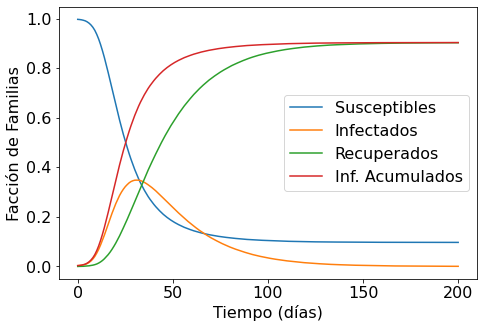

In [5]:
t = arange(steps+1)

figure(figsize=(7.5,5))
plot(t, Sc/size, label='Susceptibles')
plot(t, Ic/size, label='Infectados')
plot(t, Rc/size, label='Recuperados')
plot(t, (Ic+Rc)/size, label='Inf. Acumulados')
legend()
ylabel('Facción de Familias')
xlabel('Tiempo (días)')

In [ ]:
steps = 200
size = 300000
connectivity = 50
i0 = 1000
beta= 0.0009
gamma = .05
quarantine = 0

Sc, Ic, Rc = epidemicSimulation(steps, size, connectivity, i0, beta, gamma, quarantine )

Text(0.5, 0, 'Tiempo (días)')

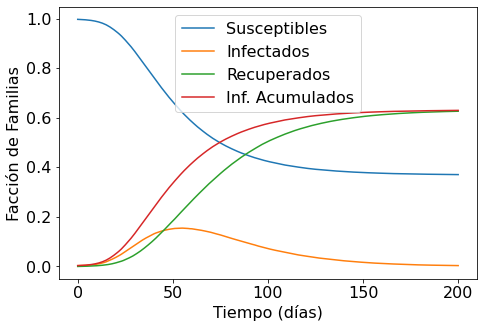

In [8]:
t = arange(steps+1)

figure(figsize=(7.5,5))
plot(t, Sc/size, label='Susceptibles')
plot(t, Ic/size, label='Infectados')
plot(t, Rc/size, label='Recuperados')
plot(t, (Ic+Rc)/size, label='Inf. Acumulados')
legend()
ylabel('Facción de Familias')
xlabel('Tiempo (días)')

In [10]:
steps = 200
size = 300000
connectivity = 25
i0 = 1000
beta= 0.0009
gamma = .05
quarantine = 0

Sc, Ic, Rc = epidemicSimulation(steps, size, connectivity, i0, beta, gamma, quarantine )

Text(0.5, 0, 'Tiempo (días)')

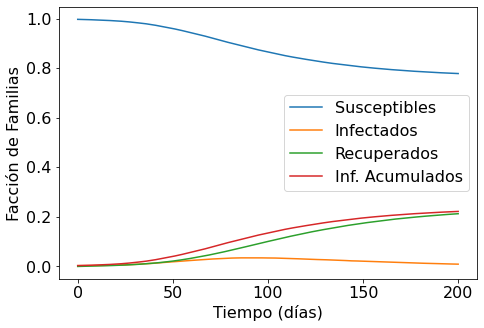

In [11]:
t = arange(steps+1)

figure(figsize=(7.5,5))
plot(t, Sc/size, label='Susceptibles')
plot(t, Ic/size, label='Infectados')
plot(t, Rc/size, label='Recuperados')
plot(t, (Ic+Rc)/size, label='Inf. Acumulados')
legend()
ylabel('Facción de Familias')
xlabel('Tiempo (días)')

Text(0.5, 0, 'Tiempo (días)')

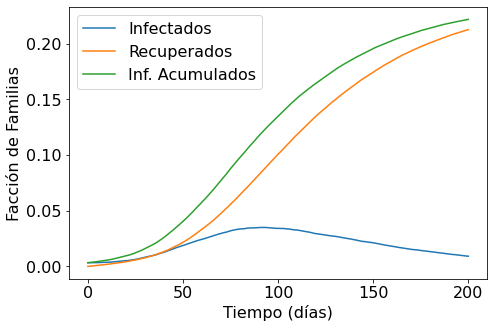

In [12]:
t = arange(steps+1)

figure(figsize=(7.5,5))
#plot(t, Sc/size, label='Susceptibles')
plot(t, Ic/size, label='Infectados')
plot(t, Rc/size, label='Recuperados')
plot(t, (Ic+Rc)/size, label='Inf. Acumulados')
legend()
ylabel('Facción de Familias')
xlabel('Tiempo (días)')